In [68]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)
import datetime
from datetime import datetime
from datetime import date
import calendar
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
low_memory=False
data = pd.read_csv('data-2.csv')
data

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,40,42,43,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,change_type,covered_recipient_type,teaching_hospital_ccn,teaching_hospital_id,teaching_hospital_name,physician_profile_id,physician_first_name,physician_middle_name,physician_last_name,physician_name_suffix,...,product_category_or_therapeutic_area_4,name_of_drug_or_biological_or_device_or_medical_supply_4,associated_drug_or_biological_ndc_4,covered_or_noncovered_indicator_5,indicate_drug_or_biological_or_device_or_medical_supply_5,product_category_or_therapeutic_area_5,name_of_drug_or_biological_or_device_or_medical_supply_5,associated_drug_or_biological_ndc_5,program_year,payment_publication_date
0,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,222922.0,MEGHAN,E,LYNCH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022
1,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,361781.0,KAREN,H,HALLMARK,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022
2,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,953706.0,NANCY,N,THOMAS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022
3,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,262063.0,LAURI,W,BULLEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022
4,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,14903.0,DANIEL,P,MOKRY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80765,CHANGED,Covered Recipient Physician,NaN,NaN,NaN,222698.0,STEVEN,GARTH,NELSON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022
80766,CHANGED,Covered Recipient Physician,NaN,NaN,NaN,328265.0,JUDDSON,D,LINDLEY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022
80767,CHANGED,Covered Recipient Physician,NaN,NaN,NaN,155386.0,MIRIAM,L,CREMER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022
80768,CHANGED,Covered Recipient Physician,NaN,NaN,NaN,252261.0,BARBARA,ANNE,KAMER-THOMPSON,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022


In [103]:
data.nature_of_payment_or_transfer_of_value.value_counts()

Food and Beverage                                                                                                                                     76614
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program     2102
Travel and Lodging                                                                                                                                     1124
Gift                                                                                                                                                    347
Education                                                                                                                                               301
Consulting Fee                                                                                                                                          260
Royalty or License                                              

In [105]:
data.loc[data["nature_of_payment_or_transfer_of_value"].str.contains('Food and Beverage')]["total_amount_of_payment_usdollars"].sum()

1420551.5399999998

In [110]:
food = data.loc[data["nature_of_payment_or_transfer_of_value"].str.contains('Food and Beverage')]
food.total_amount_of_payment_usdollars.sum()

1420551.5399999998

In [104]:
76614/80770

0.9485452519499814

In [111]:
data.physician_last_name.value_counts()

SMITH       343
MILLER      322
WILLIAMS    311
BROWN       288
LEE         271
           ... 
ELKIN         1
HESLA         1
WEAR          1
CALCAGNO      1
SCHAT         1
Name: physician_last_name, Length: 12099, dtype: int64

In [3]:
data.date_of_payment.value_counts() 
# plot this as bar graph as day of year

02/19/2020    931
02/12/2020    865
01/22/2020    856
01/23/2020    846
02/13/2020    833
             ... 
06/20/2020      1
06/07/2020      1
05/03/2020      1
06/21/2020      1
05/10/2020      1
Name: date_of_payment, Length: 356, dtype: int64

In [4]:
data['date_of_payment'] = pd.to_datetime(data['date_of_payment']).dt.date
data['day_of_week'] = data['date_of_payment'].apply(lambda x: x.weekday()) # get the weekday index, between 0 and 6
data['day_of_week'] = data['day_of_week'].apply(lambda x: calendar.day_name[x])
data.day_of_week.value_counts()

Wednesday    19205
Thursday     18919
Tuesday      18838
Monday       14025
Friday        8685
Saturday       802
Sunday         296
Name: day_of_week, dtype: int64

In [5]:
lo_loestrin_fe = data.loc[data["name_of_drug_or_biological_or_device_or_medical_supply_1"].str.contains('LO LOESTRIN FE')]
annovera = data.loc[data["name_of_drug_or_biological_or_device_or_medical_supply_1"].str.contains('ANNOVERA')]
nexplanon = data.loc[data["name_of_drug_or_biological_or_device_or_medical_supply_1"].str.contains('NEXPLANON')]
birth_control = lo_loestrin_fe.append(annovera).append(nexplanon)

In [6]:
payments_by_day_total = pd.DataFrame(
    {'Day of Week': np.array(['Saturday', 'Friday', 'Thursday', 'Wednesday','Tuesday','Monday','Sunday']),
    'Number of Womens Health-Related Payments': np.array([802, 8685, 18919, 19205,18838,14025,296])}
)
payments_by_day_total

,Day of Week,Number of Womens Health-Related Payments
0,Saturday,802
1,Friday,8685
2,Thursday,18919
3,Wednesday,19205
4,Tuesday,18838
5,Monday,14025
6,Sunday,296


<ipython-input-80-b6dc2b5684fe>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0.0, 0, '0'),
 Text(5000.0, 0, '5,000'),
 Text(10000.0, 0, '10,000'),
 Text(15000.0, 0, '15,000'),
 Text(20000.0, 0, '20,000'),
 Text(25000.0, 0, '25,000')]

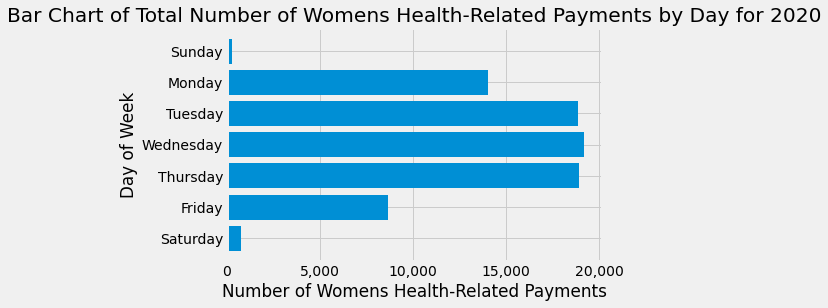

In [80]:
payments_weekday = data['day_of_week']
num_payments_weekday = data.day_of_week.value_counts()
plotting = plt.barh(payments_by_day_total['Day of Week'], payments_by_day_total['Number of Womens Health-Related Payments'])
plt.xlabel('Number of Womens Health-Related Payments')
plt.ylabel('Day of Week')
plt.title('Bar Chart of Total Number of Womens Health-Related Payments by Day for 2020')
plt.savefig("Myfigure.png", dpi=1000)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

In [58]:
payments_by_day_total.style.format({
    "Number of Womens Health-Related Payments": "{:,d}",
})

,Day of Week,Number of Womens Health-Related Payments
0,Saturday,802
1,Friday,"8,685"
2,Thursday,"18,919"
3,Wednesday,"19,205"
4,Tuesday,"18,838"
5,Monday,"14,025"
6,Sunday,296


In [8]:
payments_by_day = pd.DataFrame(
    {'Day of Week': np.array(['Saturday', 'Friday', 'Thursday', 'Wednesday','Tuesday','Monday','Sunday']),
    'Number of Birth Control Payments': np.array([241, 2857, 6282, 6710,6120,4523,91])}
)
payments_by_day

,Day of Week,Number of Birth Control Payments
0,Saturday,241
1,Friday,2857
2,Thursday,6282
3,Wednesday,6710
4,Tuesday,6120
5,Monday,4523
6,Sunday,91


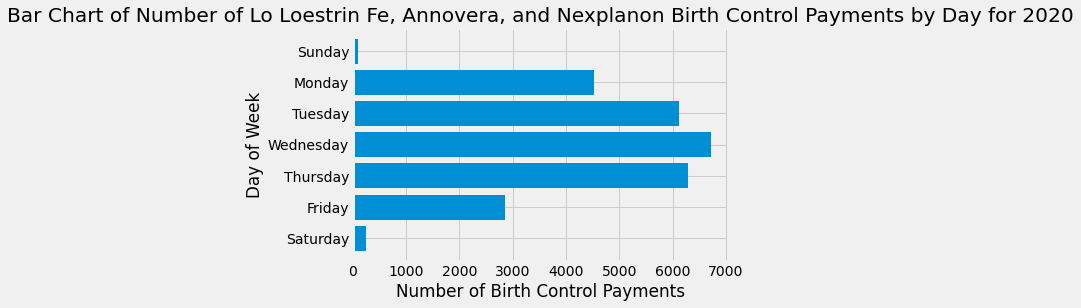

In [47]:
payments_weekday_bc = birth_control['day_of_week']
num_payments_weekday_bc = birth_control.day_of_week.value_counts()
plt.barh(payments_by_day['Day of Week'], payments_by_day['Number of Birth Control Payments'])
plt.xlabel('Number of Birth Control Payments')
plt.ylabel('Day of Week')
plt.title('Bar Chart of Number of Lo Loestrin Fe, Annovera, and Nexplanon Birth Control Payments by Day for 2020')
plt.savefig("Myfigure.png", dpi=300)

In [10]:
plt.savefig("Myfigure.png", dpi=300)

<Figure size 432x288 with 0 Axes>

In [11]:
birth_control.day_of_week.value_counts()

Wednesday    6710
Thursday     6282
Tuesday      6120
Monday       4523
Friday       2857
Saturday      241
Sunday         91
Name: day_of_week, dtype: int64

In [12]:
birth_control.day_of_week.value_counts('Saturday')

Wednesday    0.250149
Thursday     0.234193
Tuesday      0.228154
Monday       0.168618
Friday       0.106509
Saturday     0.008984
Sunday       0.003392
Name: day_of_week, dtype: float64

In [13]:
(0.008984 + 0.003392)*100

1.2376000000000003

In [14]:
def amount_money_by_state(state):
    """Sums amount of money by state"""
    return float(data.loc[data["recipient_state"].str.contains(state)]["total_amount_of_payment_usdollars"].sum())
amount_money_by_state('CO')

98330.69

<BarContainer object of 356 artists>

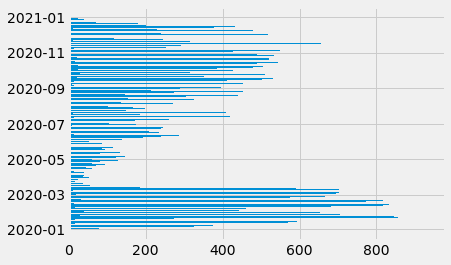

In [15]:
plt.barh(data.date_of_payment.value_counts().index[-365:], data.date_of_payment.value_counts().values[-365:])

In [16]:
womens_payments = data.nature_of_payment_or_transfer_of_value.value_counts()
womens_drugs = data.name_of_drug_or_biological_or_device_or_medical_supply_1
womens_form_payment = data.form_of_payment_or_transfer_of_value
womens_inc = data.submitting_applicable_manufacturer_or_applicable_gpo_name

In [17]:
womens_inc.value_counts()

AbbVie Inc.                                      39215
TherapeuticsMD, Inc.                             12895
Merck Sharp & Dohme Corporation                   7168
Bayer HealthCare Pharmaceuticals Inc.             7154
Pfizer Inc.                                       6129
Allergan, Inc.                                    4297
Mylan Inc.                                        1696
CooperSurgical, Inc.                               671
Philips Electronics North America Corporation      619
ASCEND THERAPEUTICS US, LLC                        564
Duchesnay USA Incorporated                         123
Becton, Dickinson and Company                      110
Medicines360                                        60
Ferring Pharmaceuticals Inc.                        50
MAYNE PHARMA INC.                                    6
CSL Behring                                          4
Hikma Pharmaceuticals USA                            3
Mylan Pharmaceuticals Inc.                           3
ASCEND The

In [18]:
womens_form_payment.value_counts()

In-kind items and services    77554
Cash or cash equivalent        3216
Name: form_of_payment_or_transfer_of_value, dtype: int64

In [19]:
data.loc[data["recipient_state"].str.contains("CA")]["total_amount_of_payment_usdollars"].sum()

1043191.14

In [20]:
jordan = data.loc[data["applicable_manufacturer_or_applicable_gpo_making_payment_country"].str.contains("Jordan")]
jordan.name_of_drug_or_biological_or_device_or_medical_supply_1

129    LYSTEDA
Name: name_of_drug_or_biological_or_device_or_medical_supply_1, dtype: object

In [21]:
data.loc[data["name_of_drug_or_biological_or_device_or_medical_supply_1"].str.contains("LYSTEDA")]

,change_type,covered_recipient_type,teaching_hospital_ccn,teaching_hospital_id,teaching_hospital_name,physician_profile_id,physician_first_name,physician_middle_name,physician_last_name,physician_name_suffix,...,name_of_drug_or_biological_or_device_or_medical_supply_4,associated_drug_or_biological_ndc_4,covered_or_noncovered_indicator_5,indicate_drug_or_biological_or_device_or_medical_supply_5,product_category_or_therapeutic_area_5,name_of_drug_or_biological_or_device_or_medical_supply_5,associated_drug_or_biological_ndc_5,program_year,payment_publication_date,day_of_week
129,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,343004.0,DAVID,F,ARCHER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,01/21/2022,Wednesday


In [22]:
recipient_state = data.recipient_state
recipient_state.value_counts()[0:58]

CA    8970
TX    8871
FL    5863
NY    4608
GA    3828
IL    3105
OH    2839
NC    2542
PA    2505
MI    2372
VA    2288
MD    2285
TN    2271
MO    2231
NJ    2138
AZ    1964
AL    1963
LA    1836
SC    1555
IN    1534
CT    1364
MS    1256
OK    1233
KY    1152
CO    1012
NV     981
AR     966
KS     923
WA     752
UT     621
NE     620
WV     580
MA     535
OR     385
HI     378
DE     374
RI     278
DC     233
IA     229
WI     216
NM     202
ID     187
MN     146
MT     108
ND      88
NH      85
PR      81
WY      62
ME      60
SD      59
AK      27
VT       7
AP       1
AE       1
Name: recipient_state, dtype: int64

In [23]:
def amount_money_by_state(state):
    """Sums amount of money by state"""
    return float(data.loc[data["recipient_state"].str.contains(state)]["total_amount_of_payment_usdollars"].sum())
amount_money_by_state('VT')

1584.92

In [24]:
CA = 1043191.14
TX = 409370.13999999996
FL = 548306.27
NY = 315740.12
GA = 206318.77000000002
IL = 232497.27000000002
OH = 190800.63999999998
NC = 142107.05
PA = 219860.32
MI = 234043.17000000004
VA = 243133.92
MD = 190058.25999999998
TN = 132067.18000000002
MO = 167070.3
NJ = 112668.54000000001
AZ = 162085.81
AL = 132717.77
LA = 83270.6
SC = 124332.62000000001
IN = 76507.26000000001
CT = 106728.08
MS = 37830.09
OK = 42086.98999999999
KY = 123747.43
CO = 98330.69
NV = 23535.58
AR = 21057.39
KS = 71795.36
WA = 95823.84
UT = 38397.78
NE = 47456.729999999996
WV = 33174.009999999995
MA = 74470.57
OR = 25348.45
HI = 15450.66
DE = 61452.08
RI = 15515.150000000001
DC = 12414.05
IA = 20815.77
WI = 22477.41
NM = 19630.019999999997
ID = 10141.470000000001
MN = 23172.739999999998
MT = 1945.5299999999997
ND = 10580.35
NH = 5615.030000000001
PR = 16592.22
WY = 1104.8500000000001
ME = 7188.5
SD = 3811.6499999999996
AK = 482.06999999999994
VT = 1584.92

In [25]:
west = WA + OR + ID + MT + WY + CA + NV + UT + CO + AZ + NM + AK + HI 
south = TX + OK + AR + LA + WV + VA + KY + TN + NC + SC + GA + MS + AL + FL + DC + DE + MD
midwest = ND + SD + NE + KS + MN + IA + MO + WI + IL + MI + IN + OH 
northeast = ME + NH + VT + MA + RI + CT + NY + PA + NJ 

In [26]:
print(west, south, midwest, northeast)

1535467.8900000001 2543444.62 1101028.65 859371.23


In [27]:
west/78631266	

0.019527447135341814

In [28]:
south/126409007

0.020120754686412497

In [29]:
midwest/68935174

0.015971942712438788

In [30]:
northeast/57525633

0.014938926964958386

In [31]:
(south/126409007)/(northeast/57525633)

1.346867464685309

In [32]:
percapita_region = pd.DataFrame(
    {'Region': np.array(['Northeast', 'South', 'Midwest', 'West']),
    'Dollar amount per capita': np.array([0.014938926964958386, 0.020120754686412497, 0.015971942712438788,0.019527447135341814])}
)
percapita_region

,Region,Dollar amount per capita
0,Northeast,0.014939
1,South,0.020121
2,Midwest,0.015972
3,West,0.019527


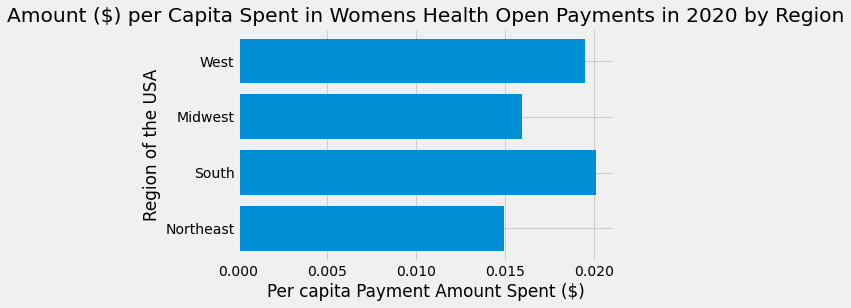

In [97]:
region = percapita_region['Region']
plt.barh(percapita_region['Region'], percapita_region['Dollar amount per capita'])
plt.xlabel('Per capita Payment Amount Spent ($)')
plt.ylabel('Region of the USA')
plt.title('Amount ($) per Capita Spent in Womens Health Open Payments in 2020 by Region')
plt.savefig("Myfigure.png", dpi=1200)
plt.show()

In [34]:
populations = pd.read_csv('NST-EST2021-popchg2020_2021.csv')

In [35]:
data.applicable_manufacturer_or_applicable_gpo_making_payment_country.value_counts()

United States    80769
Jordan               1
Name: applicable_manufacturer_or_applicable_gpo_making_payment_country, dtype: int64

In [36]:
womens_drugs.value_counts()

ORILISSA                                 20658
LO LOESTRIN FE                           12497
ORIAHNN                                   9117
ANNOVERA                                  8019
NEXPLANON                                 6308
Kyleena                                   6126
PREMARIN                                  6113
IMVEXXY                                   4031
Xulane                                    1699
LILETTA                                   1233
Mirena                                    1007
BIJUVA                                     845
Endosee                                    671
FOLLISTIM AQ                               664
ESTROGEL                                   346
(3128) Premium DiamondClean Handles        255
BINOSTO                                    210
(0363) High Flexcare Handles               200
NUVARING                                   172
Osphena                                    123
(5089) High Flexcare Platinum Handles       83
Liletta      

In [37]:
womens_drugs2 = data.name_of_drug_or_biological_or_device_or_medical_supply_2

In [38]:
data.program_year.value_counts()

2020    80770
Name: program_year, dtype: int64

In [39]:
womens_drugs.describe()

count        80770
unique          50
top       ORILISSA
freq         20658
Name: name_of_drug_or_biological_or_device_or_medical_supply_1, dtype: object

In [40]:
womens_drugs.value_counts()[0:5]

ORILISSA          20658
LO LOESTRIN FE    12497
ORIAHNN            9117
ANNOVERA           8019
NEXPLANON          6308
Name: name_of_drug_or_biological_or_device_or_medical_supply_1, dtype: int64

In [41]:
top_5 = womens_drugs.value_counts()[0:5].sum()
top_5

56599

In [42]:
all_drugs = womens_drugs.value_counts().sum()
all_drugs

80770

In [43]:
top_5/all_drugs

0.7007428500680946

In [44]:
amount_money = data.total_amount_of_payment_usdollars
amount_money.sum()

6055934.83

In [45]:
data.product_category_or_therapeutic_area_2.value_counts()

WOMENS HEALTH                                  12786
Women's Health                                  5015
VACCINE                                         3855
OBSTETRICSGYNECOLOGY WOMEN'S HEALTH             2804
GASTROINTESTINAL                                 977
Pre-Natal Care                                    81
GENITOURINARY (SEXUAL HEALTH);WOMENS HEALTH       29
IMMUNOLOGY                                        14
Diabetes Care                                      7
INFLAMMATION;PAIN                                  3
ENDOCRINOLOGY                                      3
Oncology                                           3
RETINA                                             2
Name: product_category_or_therapeutic_area_2, dtype: int64

In [94]:
makena = pd.read_csv('data-3.csv')
makena.product_category_or_therapeutic_area_1.value_counts()

REDUCTION OF RISK FOR PRETERM BIRTH    501
Name: product_category_or_therapeutic_area_1, dtype: int64

In [91]:
data_3.total_amount_of_payment_usdollars.sum()

90178.81

In [93]:
data_4 = pd.read_csv('data-4.csv')
data_4.name_of_drug_or_biological_or_device_or_medical_supply_1.value_counts()

MAKENA    501
Name: name_of_drug_or_biological_or_device_or_medical_supply_1, dtype: int64

In [95]:
makena.recipient_state.value_counts()

TX    65
CA    62
VA    33
OK    29
MS    27
SC    23
NY    22
NJ    21
NC    21
AL    20
PA    20
FL    18
MD    16
GA    16
OH    15
MO    13
IL    12
IN    12
CT     9
DE     8
WV     7
TN     7
AZ     5
LA     4
MI     4
NE     3
WA     3
KY     2
WI     1
NM     1
MA     1
SD     1
Name: recipient_state, dtype: int64